# 17章 サポートベクターマシン

## レシピ17.0 はじめに
サポートベクターマシン（support vector machine）を理解するには、超平面（hyperplane）を理解する必要がある。形式的にいうと、超平面とはn次元空間内のn-1次元の部分空間である。複雑に聞こえるかもしれないが、実は簡単な話だ。例えば、2次元空間を2つに分けるには1次元の超平面（すなわち直線）で分割する。3次元空間を分割するには2次元の超平面（例えば平らな紙やベッドシーツのような平面）で分割する。超平面は単にこれをn次元に拡張したものだ。

サポートベクターマシンは、訓練データ内のクラス感のマージンを最大化する超平面を見つけることで、データをクラス分類する。2次元の例では、この超平面は、2つのクラスを分ける最大限に幅の広い帯（つまり線にマージンが付いたもの）になる。

本章では、さまざまな場合のサポートベクターマシンの訓練方法を説明する。さらに、このアルゴリズムの動作を説明し、このアルゴリズムを拡張して一般的な問題を解決する方法を解説する。

## レシピ17.1 線形クラス分類器の訓練
### 問題
観測値をクラス分類するモデルを訓練したい。
### 解決策
サポートベクタークラス分類器（SVC: support vector classifier）を用いて、クラス間のマージンを最大化する超平面を求める。

In [0]:
# ライブラリをロード
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# データをロード with only two classes and two features
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

# 特徴量を標準化
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# サポートベクタクラス分類器を作成
svc = LinearSVC(C=1.0)

# サポートベクタクラス分類器を訓練
model = svc.fit(features_standardized, target)

### 議論
scikit-learnのLinearSVCは、単純なSVCを実装したものだ。SVCの動作を直感的に理解するために、データと超平面をプロットしてみよう。

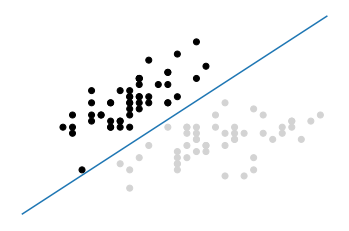

In [2]:
# ライブラリをロード
from matplotlib import pyplot as plt

# 観測値をそれぞれの色でプロット
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# 超平面を作成
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# 超平面をプロット
plt.plot(xx, yy)
plt.axis("off"), plt.show();

この図の左上隅に新しい観測値を作って、この動作を確認してみよう。

In [3]:
# 新たな観測値の作成
new_observation = [[ -2,  3]]

# 新たな観測値のクラスを予測
svc.predict(new_observation)

array([0])

## レシピ17.2 カーネルを用いた線形分離不能なクラスの取り扱い
### 問題
クラスは線形分離不能だが、サポートベクターマシンで分離したい。
### 解決策
サポートベクターマシンのカーネル関数を用いた拡張を使って、非線形な決定境界を実現する。

In [0]:
# ライブラリをロード
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 乱数シードを設定
np.random.seed(0)

# 2つの特徴量を生成
features = np.random.randn(200, 2)

# XORゲート(ここでは分からなくて良い)を用いて、
# 線形分離不能なデータを作成
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# 放射基底関数(rbf)カーネルを用いたサポートベクタマシンを作成
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# クラス分類器を訓練
model = svc.fit(features, target)

このレシピの解決策では2つの特徴量からなる特徴量行列と、クラスを与えるター源とベクトルからなるデータを用いた。ここで重要なのは、クラスが線形分離不能なように与えられていることだ。したがって、2つのクラスを分離する直線を引くことはできない。まず、線形カーネルを用いてサポートベクタークラス分類器を作ってみよう。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


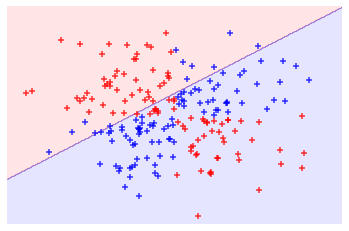

In [6]:
# 観測値と決定境界超平面をプロット
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker="+", label=cl)

##########

# 線形カーネルを用いたサポートベクタクラス分類器を作成
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# クラス分類器を訓練
svc_linear.fit(features, target)

##########

# 観測値と超平面をプロット
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show();

図からわかるように線形の超平面は2つのクラスを全く分離できていない。そこで、線形カーネルを放射基底関数カーネルに置き換えて、新しくモデルを訓練してみよう。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


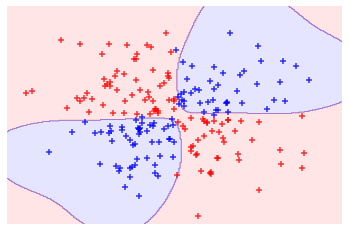

In [7]:
# 放射基底関数カーネルを用いたサポートベクタクラス分類器を作成
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# クラス分類器を訓練
model = svc.fit(features, target)

###########

# 観測値と超平面をプロット
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"), plt.show();

放射基底関数カーネルを用いることで、線形カーネルよりも遥かによく2つのクラスを分離する決定境界を作ることができた。これが、サポートベクターマシンでカーネルを用いる理由だ。

In [0]:
# ライブラリをロード
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# データをロード with only two classes and two features
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

# 特徴量を標準化
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

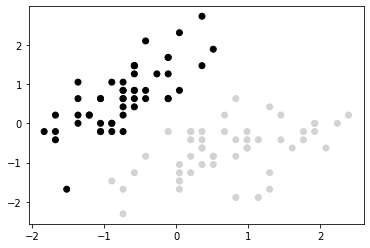

In [9]:
# ライブラリをロード
from matplotlib import pyplot as plt

# 観測値をそれぞれの色でプロット
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

In [0]:
# サポートベクタクラス分類器を作成
svc = LinearSVC(C=1.0)

# サポートベクタクラス分類器を訓練
model = svc.fit(features_standardized, target)

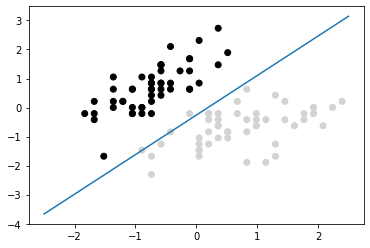

In [18]:
# 観測値をそれぞれの色でプロット
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# 超平面を作成
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# 超平面をプロット
plt.plot(xx, yy)
plt.show();

In [13]:
svc.coef_[0]

array([ 1.68971159, -1.2408797 ])

In [14]:
svc.intercept_

array([0.25980227])

In [16]:
features_standardized

array([[-5.81065904e-01,  8.41837140e-01],
       [-8.94308978e-01, -2.07835104e-01],
       [-1.20755205e+00,  2.12033793e-01],
       [-1.36417359e+00,  2.09934449e-03],
       [-7.37687441e-01,  1.05177159e+00],
       [-1.11201292e-01,  1.68157493e+00],
       [-1.36417359e+00,  6.31902691e-01],
       [-7.37687441e-01,  6.31902691e-01],
       [-1.67741667e+00, -4.17769553e-01],
       [-8.94308978e-01,  2.09934449e-03],
       [-1.11201292e-01,  1.26170604e+00],
       [-1.05093052e+00,  6.31902691e-01],
       [-1.05093052e+00, -2.07835104e-01],
       [-1.83403820e+00, -2.07835104e-01],
       [ 5.15284858e-01,  1.89150938e+00],
       [ 3.58663321e-01,  2.73124718e+00],
       [-1.11201292e-01,  1.68157493e+00],
       [-5.81065904e-01,  8.41837140e-01],
       [ 3.58663321e-01,  1.47164049e+00],
       [-5.81065904e-01,  1.47164049e+00],
       [-1.11201292e-01,  6.31902691e-01],
       [-5.81065904e-01,  1.26170604e+00],
       [-1.36417359e+00,  1.05177159e+00],
       [-5.